### Installing required Libraries

In [1]:
!pip install yfinance
!pip install bs4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
cookiecutter 1.7.2 requires Jinja2<3.0.0, but you have jinja2 3.0.3 which is incompatible.
cookiecutter 1.7.2 requires MarkupSafe<2.0.0, but you have markupsafe 2.1.5 which is incompatible.



  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.3-py3-none-any.whl size=138453 sha256=e5b3989758edef174a025cd1ddeeadb8514c3dc301ecef8af5fee82e8bdbf539
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\a7\64\49\81f05b55b5fcafe2ea6316aac808b15228715abc3d2632a240
Successfully built peewee
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
  Attempting uninstall: beautifulsoup4
    Found existing installation:

### Importing relevant Libraries 


In [164]:
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

### Defining Graphing Function

In [165]:
def plot_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price ($)", "Historical Revenue ($)"), vertical_spacing = .5)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($ Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=1000, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

### Task 1:  Use yfinance to Extract Stock Data  ForTesla

In [166]:
# Using the Ticker function to create a ticker object.
# ticker symbol for Tesla is TSLA
tesla_data = yf.Ticker('TSLA')

In [167]:
# using the attribute info, we can exctract stock info as a Python Dictionary
tesla_info = tesla_data.info
tesla_info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

In [168]:
tesla_data.info['country']

'United States'

In [169]:
tesla_data.info['city']

'Austin'

In [170]:
# history function helps to extract stock information like share price.
# setting period parameter to max to get information for the maximum amount of time.
tsla_data = tesla_data.history(period='max')

In [171]:
# Resetting the index
tsla_data.reset_index(inplace=True)


In [172]:
# display the first five rows
tsla_data.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
5,2010-07-07 00:00:00-04:00,1.093333,1.108667,0.998667,1.053333,103825500,0.0,0.0
6,2010-07-08 00:00:00-04:00,1.076000,1.168000,1.038000,1.164000,115671000,0.0,0.0
7,2010-07-09 00:00:00-04:00,1.172000,1.193333,1.103333,1.160000,60759000,0.0,0.0
8,2010-07-12 00:00:00-04:00,1.196667,1.204667,1.133333,1.136667,33037500,0.0,0.0
9,2010-07-13 00:00:00-04:00,1.159333,1.242667,1.126667,1.209333,40201500,0.0,0.0


In [173]:
tsla_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3481,2024-04-29 00:00:00-04:00,188.419998,198.869995,184.539993,194.050003,243869700,0.0,0.0
3482,2024-04-30 00:00:00-04:00,186.979996,190.949997,182.839996,183.279999,127031800,0.0,0.0
3483,2024-05-01 00:00:00-04:00,182.000000,185.860001,179.009995,179.990005,92829700,0.0,0.0
3484,2024-05-02 00:00:00-04:00,182.860001,184.600006,176.020004,180.009995,89148000,0.0,0.0
3485,2024-05-03 00:00:00-04:00,182.009995,184.779999,178.539993,181.190002,75185712,0.0,0.0


In [174]:
tsla_data.info

<bound method DataFrame.info of                           Date        Open        High         Low  \
0    2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333   
1    2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333   
2    2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333   
3    2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333   
4    2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333   
...                        ...         ...         ...         ...   
3481 2024-04-29 00:00:00-04:00  188.419998  198.869995  184.539993   
3482 2024-04-30 00:00:00-04:00  186.979996  190.949997  182.839996   
3483 2024-05-01 00:00:00-04:00  182.000000  185.860001  179.009995   
3484 2024-05-02 00:00:00-04:00  182.860001  184.600006  176.020004   
3485 2024-05-03 00:00:00-04:00  182.009995  184.779999  178.539993   

           Close     Volume  Dividends  Stock Splits  
0       1.592667  281494500        0.0           0.0  
1       1.588667 

Text(0.5, 0, 'Date')

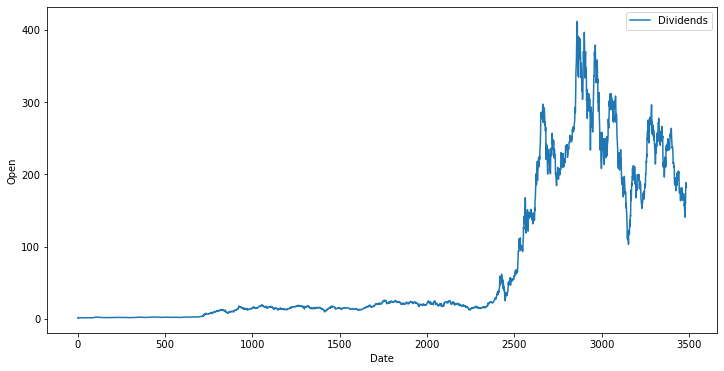

In [175]:
plt.figure(figsize=(12,6))
sns.lineplot(data=tsla_data['Open'],label="Dividends" )

plt.xlabel("Date")

We can reset the index of the DataFrame with the reset_index function. We also set the inplace parameter to True so the change takes place to the DataFrame itself. We can plot the Open price aginst the Date

<AxesSubplot:xlabel='Date'>

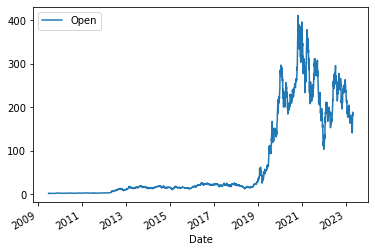

In [176]:
tsla_data.reset_index(inplace = True)
tsla_data.plot(x='Date',y='Open')

### Extracting Dividends

Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money that an inestor gets per share they own. Using the variable dividends we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.

In [177]:
tesla_data.dividends

Series([], Name: Dividends, dtype: float64)

<AxesSubplot:xlabel='Date'>

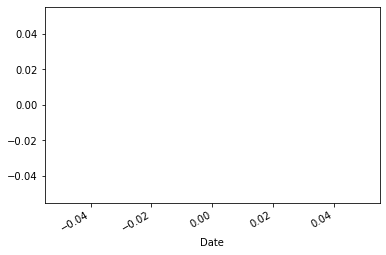

In [178]:
tesla_data.dividends.plot()

### Task 2:  Websrapping Tesla Financial Data

In [179]:
# using requests library to download the webpage
url=url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
# Save the text of the response
html_text = requests.get(url).text

# Parse the html data using beautiful_soup.
soup=BeautifulSoup(html_text, 'html5lib')

In [180]:
# Using BeautifulSoup to extract the table with Tesla Quarterly Revenue
# Creating a new DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

tesla_revenue.head()

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


In [181]:
# Remove the comma and dollar sign from the Revenue column.
# this will be handy for plotting purposes later.

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

C:\Users\User\AppData\Local\Temp/ipykernel_15924/3609529736.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



In [182]:
# Removing any null or empty strings in the Revenue column.

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [183]:
tesla_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [184]:
plot_graph(tsla_data, tesla_revenue, 'Tesla Historical Share Price & Revenue')

### 2. GameStop Stock Data
yfinance to extract stock data

In [185]:
#  ticker symbol of GameStop is GME
gamestop = yf.Ticker('GME')

In [186]:
# extracting stock information
gme_data=gamestop.history(period='max')


In [187]:
#reset the index
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [188]:
gme_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5589,2024-04-29 00:00:00-04:00,11.84,11.960000,11.180,11.290000,3821500,0.0,0.0
5590,2024-04-30 00:00:00-04:00,11.18,11.300000,10.910,11.090000,2866500,0.0,0.0
5591,2024-05-01 00:00:00-04:00,11.03,11.320000,10.700,10.910000,2653200,0.0,0.0
5592,2024-05-02 00:00:00-04:00,11.11,12.880000,10.960,12.760000,8654800,0.0,0.0
5593,2024-05-03 00:00:00-04:00,12.42,17.450001,12.335,16.469999,35268746,0.0,0.0


In [189]:
# using the attribute info, we can exctract stock info as a Python Dictionary
gme_info = gamestop.info
gme_info

{'address1': '625 Westport Parkway',
 'city': 'Grapevine',
 'state': 'TX',
 'zip': '76051',
 'country': 'United States',
 'phone': '817 424 2000',
 'website': 'https://www.gamestop.com',
 'industry': 'Specialty Retail',
 'industryKey': 'specialty-retail',
 'industryDisp': 'Specialty Retail',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its stores and ecommerce platforms in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, and virtual reality products; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It sells collectibles comprising apparel, toys, trading cards, gadgets, and other retail products for pop culture and technology enthusiasts, as wel

### Webscraping to Extract GME revenue data

In [190]:
# using requests library to download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [191]:
# Save the text of the response
html_data = requests.get(url).text


In [192]:
# parse the html data
soup=BeautifulSoup(html_data, 'html5lib')

In [193]:
# Using beautiful soup extract the table with GameStop Quarterly Revenue
# creating new dataframe
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

gme_revenue.head()


,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


In [194]:
# Removing symbols and nulls for plotting purposes later.

gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

C:\Users\User\AppData\Local\Temp/ipykernel_15924/832182196.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.



In [195]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [196]:
# using the make_graph function to plot Tesla stock Data

plot_graph(tsla_data,tesla_revenue,'Tesla')

In [197]:
plot_graph(html_data, gme_revenue, 'GameStop')

AttributeError: 'str' object has no attribute 'Date'